# Oscilador harmonico via solve_ivp

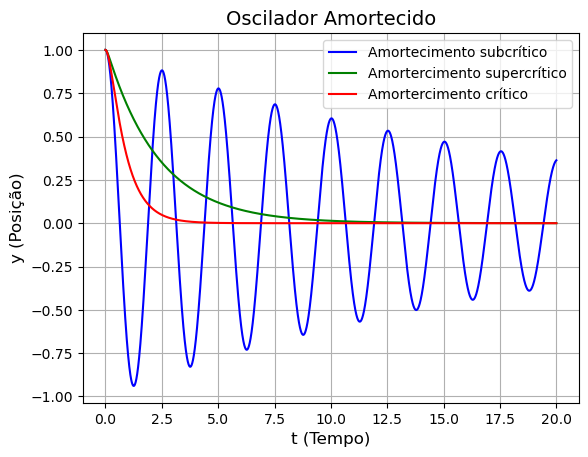

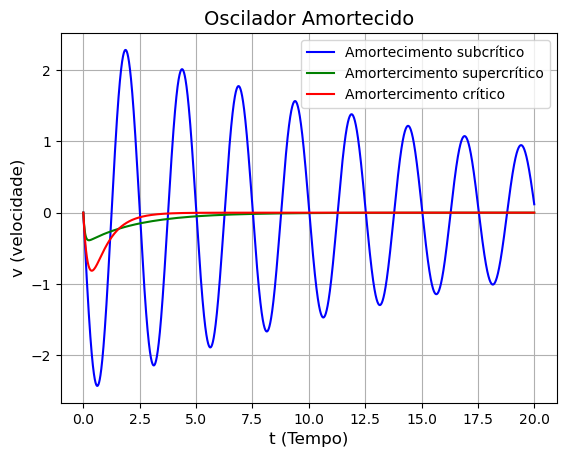

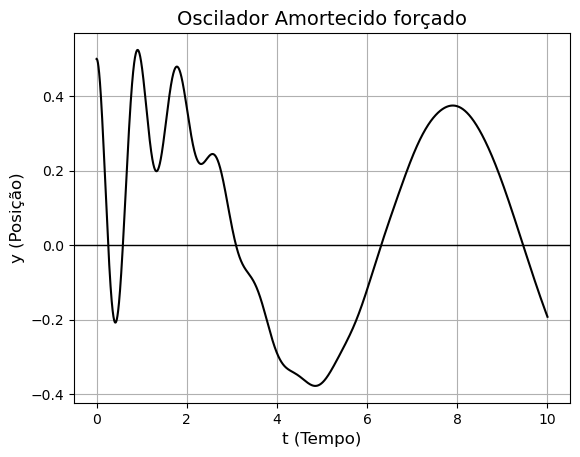

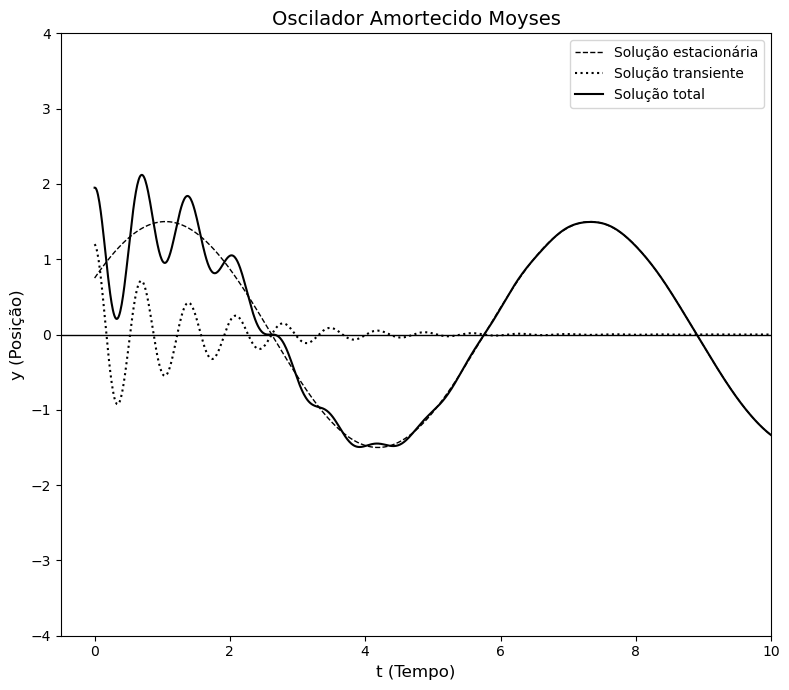

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

class OsciladorAmortecido():
    def __init__(self ,b ):
        self.b = b #parametro de amortecimento

    def oscilador_amortecido(self, t, y):
        omega_quadrado = 2*np.pi
        return (y[1], (-self.b * y[1] - omega_quadrado * y[0]))

    def oscilador_amortecido_forçado(self,t, y): #atividade extra proposta
        omega_0 = 7
        F0= 18
        omega =1
        return (y[1], (-self.b * y[1] - omega_0**2 * y[0] + F0*np.sin(omega*t))) # (dx/dt , dv/ dt) = (v , -w^2 x - bv) = d/dt vec{y}.

    def solver1(self):
        t = np.linspace(0, 20, 10000) 
        y = [1, 0]  # Condições iniciais: y(0)=1 e y'(0)=0
        solucao = solve_ivp(self.oscilador_amortecido, [0, 100], y0=y, t_eval=t, method='RK45')
        return solucao.t , solucao.y[0], solucao.y[1]

    def solver2(self):
        t = np.linspace(0, 10, 10000) 
        y = [0.5, 0]  # Condições iniciais: y(0)=0.5 e y'(0)=0
        solucao = solve_ivp(self.oscilador_amortecido_forçado, [0, 100], y0=y, t_eval=t, method='RK45')
        return solucao.t , solucao.y[0] , solucao.y[1]

    def Moyses_figura(self):
        gamma = 1.5  # Parâmetro de amortecimento
        omega_0 = 9  # Frequência natural 
        omega = 1.0    # Frequência de forçamento  
        B = 1.2      # Amplitude inicial
        phi_0 = 0  # Fase inicial
        A = 1.5        # Amplitude da solução estacionária
        t = np.linspace(0, 10, 1000)
        alpha = -np.pi/3

        # Solução transiente (oscilações livres amortecidas) 
        transiente = B * np.exp(-gamma * t / 2) * np.cos(omega_0 * t + phi_0)

        # Solução estacionária
        estacionaria = A * np.cos(omega * t + alpha)

        total = transiente + estacionaria

        plt.figure(figsize=(8, 7))
        plt.plot(t, estacionaria, 'k--', linewidth=1, label= 'Solução estacionária')  
        plt.plot(t, transiente, 'k:', linewidth=1.5 , label = 'Solução transiente')  
        plt.plot(t, total, 'k-', linewidth=1.5, label = 'Solução total')       
        plt.axhline(y=0, color='k', linewidth=1) 
        plt.xlim(-0.5, 10)
        plt.ylim(-4.0, 4.0)
        plt.xlabel('t (Tempo)', fontsize=12)
        plt.ylabel('y (Posição)', fontsize=12)
        plt.title('Oscilador Amortecido Moyses', fontsize=14)
        plt.legend()
        plt.tight_layout()
        plt.show()

solucao1 = OsciladorAmortecido(0.1) #subcritco
t, y1 , v1 = solucao1.solver1()

solucao2 = OsciladorAmortecido(15) # supercritico
t, y2, v2= solucao2.solver1()

solucao3 = OsciladorAmortecido(6) # supercrítico
t, y3, v3= solucao3.solver1()

plt.plot(t, y1, color= 'Blue', label = 'Amortecimento subcrítico')
plt.plot(t,y2, color = 'green', label = 'Amortercimento supercrítico')
plt.plot(t,y3, color = 'red', label = 'Amortercimento crítico')
plt.title('Oscilador Amortecido', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('y (Posição)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.plot(t, v1, color= 'Blue', label = 'Amortecimento subcrítico')
plt.plot(t,v2, color = 'green', label = 'Amortercimento supercrítico')
plt.plot(t,v3, color = 'red', label = 'Amortercimento crítico')
plt.title('Oscilador Amortecido', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('v (velocidade)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




solucao3 = OsciladorAmortecido(1.7)
t, y4, v4= solucao3.solver2()

plt.plot(t,y4, color= 'black')
plt.title('Oscilador Amortecido forçado', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('y (Posição)', fontsize=12)
plt.grid(True)
plt.axhline(y=0, color='k', linewidth=1) 
plt.show()

oscilador = OsciladorAmortecido(0.8)
oscilador.Moyses_figura()